In [108]:
# 参数设置 
file_path = r'C:\Users\zhang\Desktop\md\2024corning\june\sphere_ti\glass_300k_out.xyz'

# 看一下是分析所有的还是指定元素，如果是0就是默认所有元素 否则就指定元素
spcial_ana = {'is_ana':0,   'ana_ele':['Si','Al','Ti']}

In [109]:
import math
import matplotlib.pyplot as plt

def read_xyz_data(filename):
    """ 读取XYZ格式的文件数据 """
    atoms = []
    with open(filename, 'r') as file:
        next(file)  # 跳过第一行（原子总数）
        next(file)  # 跳过第二行（注释行）
        for line in file:
            parts = line.split()
            if len(parts) == 4:  # 确保每行数据正确
                atom_type, x, y, z = parts
                # 如果不是特殊分析，就全部加进去
                if spcial_ana['is_ana']== 0 :
                    atoms.append((atom_type, float(x), float(y), float(z)))
                # 如果不是 那么就选择性地加入
                elif atom_type in spcial_ana['ana_ele']:
                    atoms.append((atom_type, float(x), float(y), float(z)))
        
    return atoms

def calculate_density(atoms, center, bin_size, max_radius):
    """ 根据中心点计算每个球壳内的原子数密度分布 """
    # 计算每个原子到中心点的距离
    distances = [math.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2) for _, x, y, z in atoms]
    
    # 初始化bin计数
    max_bin = int(max_radius / bin_size)
    bin_counts = [0] * (max_bin + 1)
    
    # 统计每个bin中的原子数
    for distance in distances:
        if distance <= max_radius:
            bin_index = int(distance / bin_size)
            bin_counts[bin_index] += 1
    
    # 计算每个bin的体积和密度
    densities = []
    for i in range(max_bin):
        outer_radius = (i + 1) * bin_size
        inner_radius = i * bin_size
        shell_volume = 4/3 * math.pi * (outer_radius**3 - inner_radius**3)
        density = bin_counts[i] / shell_volume
        densities.append((i * bin_size + bin_size/2, density))
    
    return densities

In [110]:
# 示例数据文件路径
filename = file_path
# 读取原子数据
atoms = read_xyz_data(filename)

# 首先得得出最大的盒子尺寸吧  大致看一下结果
max_x, max_y, max_z = 0, 0, 0
min_x, min_y, min_z = 1, 1, 1
# 再统计一下Ti原子的平均中心位置
# count_ti = 0
sum_x, sum_y, sum_z = 0,0,0
for i_atom in atoms:
    temp_x,temp_y, temp_z = i_atom[1],i_atom[2],i_atom[3]
    max_x,max_y,max_z = max(max_x,temp_x),max(max_y,temp_y),max(max_z,temp_z)
    min_x, min_y, min_z = min(min_x, temp_x),min(min_y, temp_y),min(min_z, temp_z)
    if i_atom[0]=='Ti':
        sum_x+=temp_x
        sum_y+=temp_y
        sum_z+=temp_z
       # count_ti+=1

# 输出结果
print(f'max: {round(max_x,2)} {round(max_y,2)} {round(max_z,2)}')
print(f'min: {round(min_x,2)} {round(min_y,2)} {round(min_z,2)}')
print('')
# print(f'mean_Ti: {round(sum_x/count_ti,2)} {round(sum_y/count_ti,2)} {round(sum_z/count_ti,2)}')

max: 63.93 63.93 63.93
min: 0.0 0.0 0.0



自由坐标轴分布


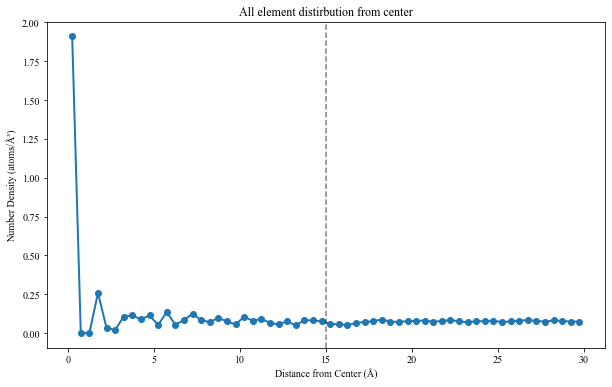

In [111]:
print('自由坐标轴分布')
# 定义中心点
center = (32.0, 32.0, 32.0)  # 例如可以更改为你的特定中心点
# 计算密度分布
bin_size = 0.5  # 每个bin的大小
max_radius = 30.0  # 最大半径范围
densities = calculate_density(atoms, center, bin_size, max_radius)

# 绘图
radii, density_values = zip(*densities)
plt.figure(figsize=(10, 6))
plt.plot(radii, density_values, marker='o',linestyle='-',linewidth=2.0)
fig_name = "All element distirbution from center"
if spcial_ana['is_ana']==1:
    fig_name = spcial_ana['ana_ele']
plt.title(fig_name)
plt.xlabel('Distance from Center (Å)')
plt.ylabel('Number Density (atoms/Å³)')
# 
# # 添加y=0的刻度线
# plt.axhline(y=0, color='red', linestyle='--')
# # 添加x的刻度线
plt.axvline(x=15, color='black', linestyle='--', alpha=0.5)
# plt.axvline(x=59.5, color='black', linestyle='--', alpha=0.5)


# plt.grid(True)
plt.show()


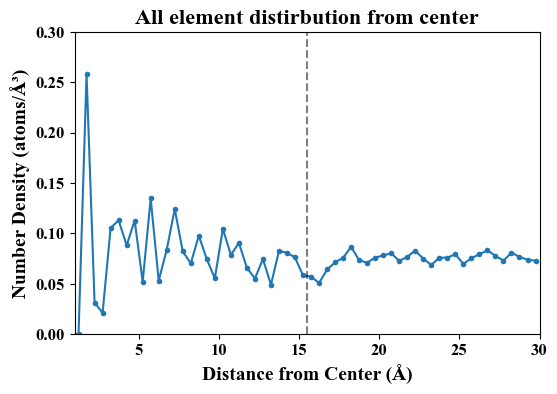

In [112]:
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 创建一个图形并设置清晰度
plt.figure(dpi=100) # ,figsize=(8, 6)

# 定义中心点
center = (32.0, 32.0, 32.0)  # 例如可以更改为你的特定中心点

# 计算密度分布
bin_size = 0.5  # 每个bin的大小
max_radius = 30.0  # 最大半径范围
densities = calculate_density(atoms, center, bin_size, max_radius)

# 绘图
radii, density_values = zip(*densities)
# plt.figure(figsize=(10, 6))
plt.plot(radii, density_values, marker='o', markersize='3',linestyle='-',linewidth=1.5)
plt.xlim(1,30)
plt.ylim(0,0.30)

# 设置X轴和Y轴的刻度值的字体为黑体和字体大小
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')


fig_name = "All element distirbution from center"
if spcial_ana['is_ana']==1:
    fig_name = spcial_ana['ana_ele']
plt.title(fig_name, fontsize=16, fontweight='bold')
plt.xlabel('Distance from Center (Å)', fontsize=14, fontweight='bold')
plt.ylabel('Number Density (atoms/Å³)', fontsize=14, fontweight='bold')
plt.axvline(x=15.5, color='black', linestyle='--', alpha=0.5)
# plt.grid(True)
plt.show()
